## An extract of Normad Chemistry Kaggle competetion.
The task for this prediction is to predict two target properties:

Formation energy (an important indicator of the stability of a material)
Bandgap energy (an important property for optoelectronic applications)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'Normad Chemistry Data\train csv\train.csv')

In [3]:
df_test= pd.read_csv(r'Normad Chemistry Data\test csv\test.csv')

In [4]:
df.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [5]:
df_test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [6]:
len(df.columns)

14

## Checking for `blancks`

In [7]:
df.isnull().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
formation_energy_ev_natom     0
bandgap_energy_ev             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2400 non-null   int64  
 1   spacegroup                  2400 non-null   int64  
 2   number_of_total_atoms       2400 non-null   float64
 3   percent_atom_al             2400 non-null   float64
 4   percent_atom_ga             2400 non-null   float64
 5   percent_atom_in             2400 non-null   float64
 6   lattice_vector_1_ang        2400 non-null   float64
 7   lattice_vector_2_ang        2400 non-null   float64
 8   lattice_vector_3_ang        2400 non-null   float64
 9   lattice_angle_alpha_degree  2400 non-null   float64
 10  lattice_angle_beta_degree   2400 non-null   float64
 11  lattice_angle_gamma_degree  2400 non-null   float64
 12  formation_energy_ev_natom   2400 non-null   float64
 13  bandgap_energy_ev           2400 

## Cool, no blanks.
## Checking for correlation in the dataset.

In [9]:
df.corr()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
id,1.000000,0.042268,-0.037464,0.021495,-0.010629,-0.012250,-0.041701,-0.036477,0.041349,0.005916,-0.031354,0.008565,-0.008242,0.034987
spacegroup,0.042268,1.000000,-0.137534,0.052268,-0.053061,-0.005620,-0.570607,-0.012211,0.569755,0.183916,-0.584661,-0.007700,0.324927,-0.072725
number_of_total_atoms,-0.037464,-0.137534,1.000000,-0.106022,-0.012030,0.117657,0.397917,0.651364,-0.002656,-0.172047,0.039425,0.055687,-0.048631,-0.106125
percent_atom_al,0.021495,0.052268,-0.106022,1.000000,-0.450122,-0.609300,-0.154387,-0.179604,0.032261,0.019183,-0.099428,-0.019175,0.108481,0.738622
percent_atom_ga,-0.010629,-0.053061,-0.012030,-0.450122,1.000000,-0.433809,0.100244,-0.125285,-0.024424,0.000648,0.128669,0.010230,-0.374817,0.012831
percent_atom_in,-0.012250,-0.005620,0.117657,-0.609300,-0.433809,1.000000,0.066761,0.292472,-0.010866,-0.019929,-0.013933,0.010259,0.223383,-0.756668
lattice_vector_1_ang,-0.041701,-0.570607,0.397917,-0.154387,0.100244,0.066761,1.000000,-0.017117,-0.560387,0.002739,0.850079,-0.303708,-0.225600,-0.138901
lattice_vector_2_ang,-0.036477,-0.012211,0.651364,-0.179604,-0.125285,0.292472,-0.017117,1.000000,-0.256180,-0.114209,-0.365709,-0.146586,-0.104137,-0.127461
lattice_vector_3_ang,0.041349,0.569755,-0.002656,0.032261,-0.024424,-0.010866,-0.560387,-0.256180,1.000000,0.071834,-0.471228,0.328274,0.454679,-0.156865
lattice_angle_alpha_degree,0.005916,0.183916,-0.172047,0.019183,0.000648,-0.019929,0.002739,-0.114209,0.071834,1.000000,0.189144,-0.446694,0.099277,-0.072313


In [10]:
import seaborn as sns

In [ ]:
def pairplot(data, x_axis= None, y_axis= None, height= 6):
    if len(x_axis)>3 and len(x_axis)<=10:
        ax= len(x_axis)
        import matplotlib.pyplot as plt
        if ax%2 == 0:
            plt.subplot(ax/2, 2, 1)
            sns.pairplot(df, x_vars=x_axis[:2], y_vars= y_axis, height= height)
        else:
            plt.subplot(ax/2, 1, 1)
            sns.pairplot(df, x_vars=x_axis[:1], y_vars= y_axis, height= height)
    else:
        input= 

In [26]:
def pairplot(data, x_axis= None, y_axis= None, height= 6):
    sns.pairplot(df, x_vars=x_axis, y_vars= y_axis, height= height, diag_kind= 'kde')

In [29]:
df.columns

Index(['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'formation_energy_ev_natom',
       'bandgap_energy_ev'],
      dtype='object')

In [36]:
len(df.columns)

14

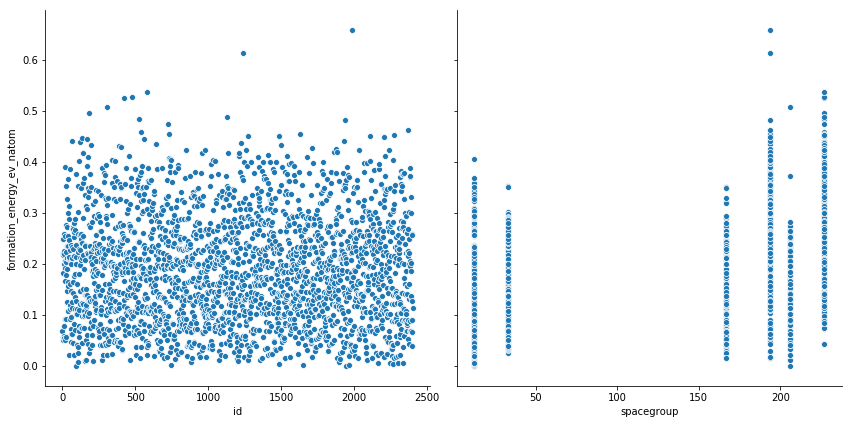

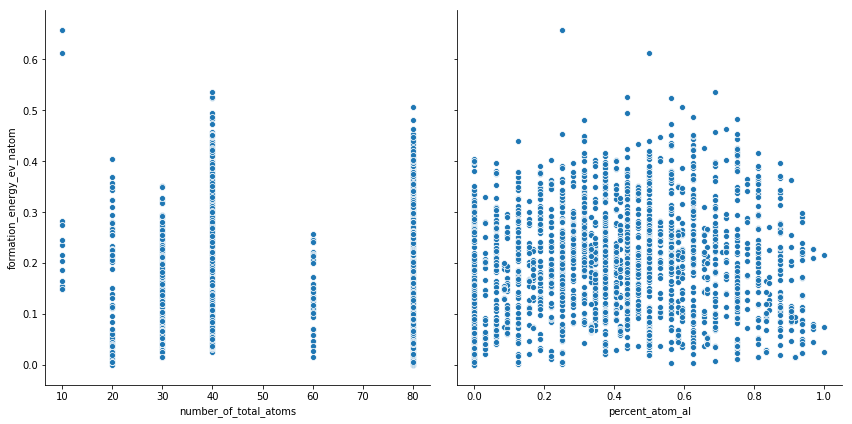

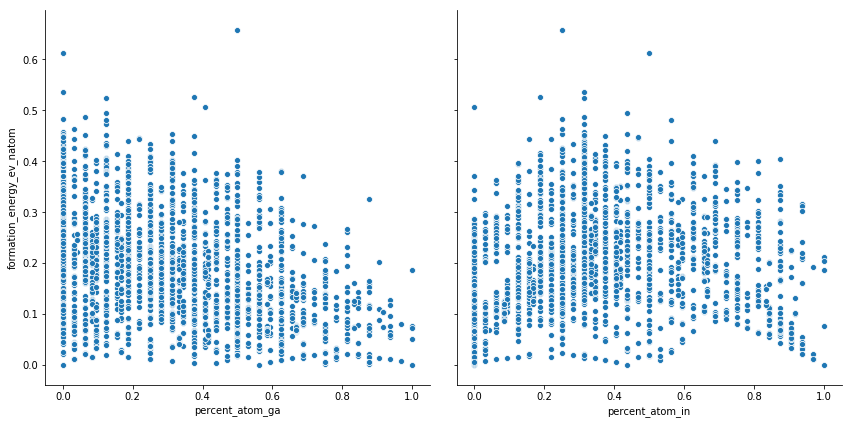

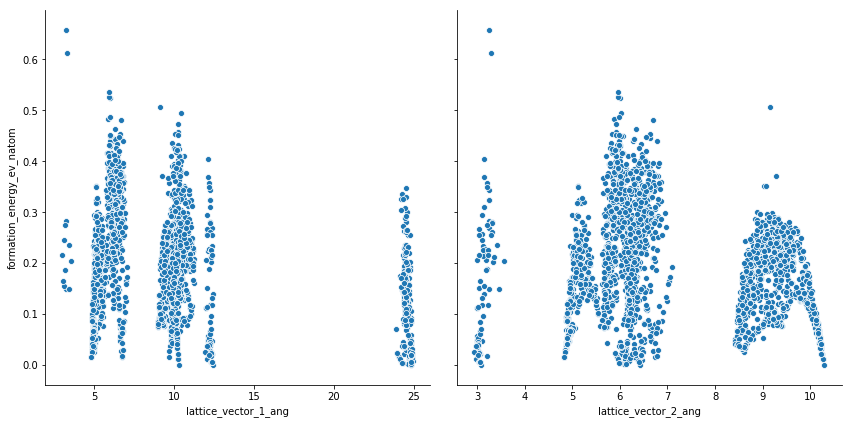

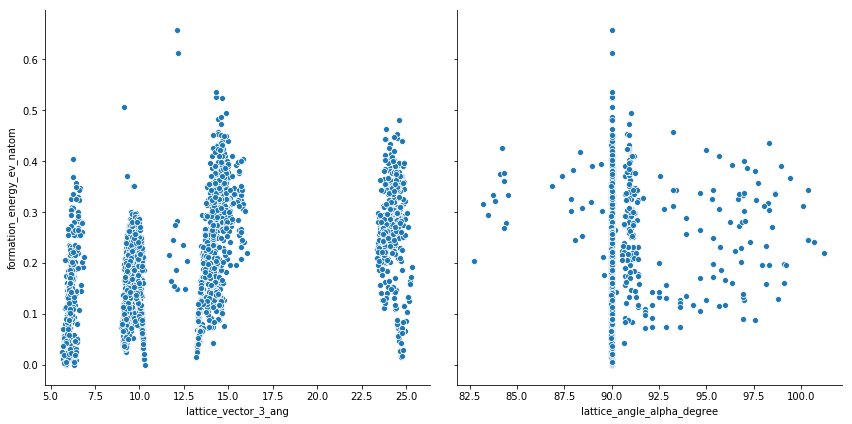

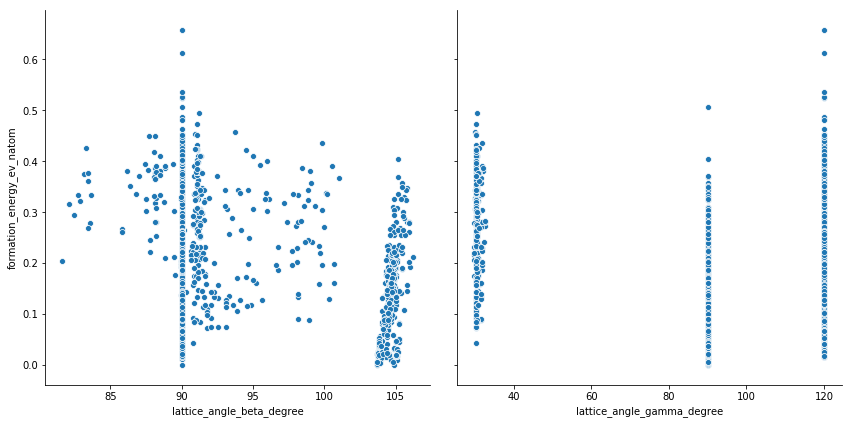

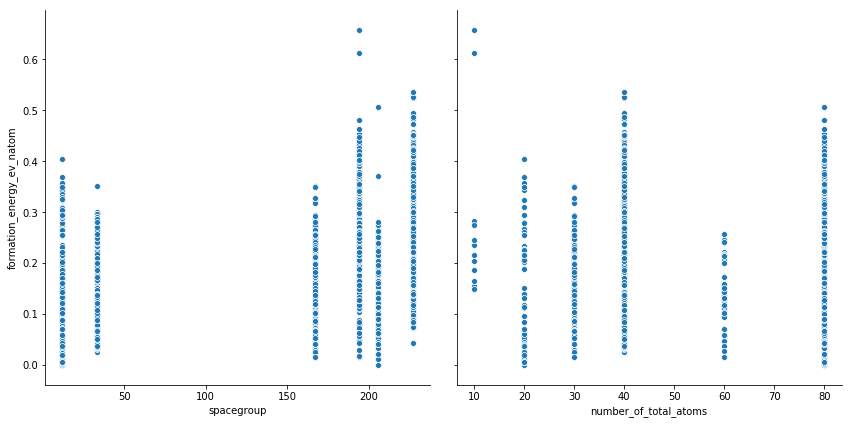

In [42]:
pairplot(df, ['id', 'spacegroup'], y_axis=['formation_energy_ev_natom'])
pairplot(df, ['number_of_total_atoms', 'percent_atom_al'], ['formation_energy_ev_natom'])
pairplot(df, ['percent_atom_ga', 'percent_atom_in'], ['formation_energy_ev_natom'])
pairplot(df, ['lattice_vector_1_ang', 'lattice_vector_2_ang'], ['formation_energy_ev_natom'])
pairplot(df, ['lattice_vector_3_ang', 'lattice_angle_alpha_degree'],['formation_energy_ev_natom'])
pairplot(df, ['lattice_angle_beta_degree', 'lattice_angle_gamma_degree'], 
         ['formation_energy_ev_natom'])
pairplot(df, x_axis= ['spacegroup', 'number_of_total_atoms'], 
         y_axis=['formation_energy_ev_natom'])
plt.show()

## Using a my built `drop_low_correlation` function. 

In [12]:
def drop_low_correlation(dataframe, data_corr_with_target, min= -0.1, max= 0.1):
    '''
    dataframe= a dataframe  matrix.
    data_corr_with_target= pandas.series.series of the target column of the correlation matrix.
        with the formart df.corr().target
    min: (Default= -0.1)float. Minimum correlation with target.
    max: (Default= +0.1) float. Maximum correlation with target.
    Returns dataframe with removed columns with low correlation.
    
    # I will still modify this.
    '''
    lst= []
    i= 0
    corr_target= data_corr_with_target
    df= dataframe
    for ite in corr_target:
        if (ite<max) and (ite >min):
            lst.append(df.columns[i])
        i+=1
    for j in range(len(lst)):
        dataframe.drop(lst[j], axis=1, inplace= True)
        
    return dataframe

In [79]:
df.columns

Index(['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'formation_energy_ev_natom',
       'bandgap_energy_ev'],
      dtype='object')

In [13]:
df_f= df.copy()
df_b= df.copy()

## Targets

In [14]:
bandgap= df['bandgap_energy_ev']
formation_energy= df['formation_energy_ev_natom']

## Dropping the targets.

In [15]:
df_f.drop('bandgap_energy_ev', 1, inplace=True)
df_b.drop('formation_energy_ev_natom', 1, inplace=True)

## Dropping columns with low correlation with the target value

In [16]:
df_f= drop_low_correlation(df_f, df_f.corr().formation_energy_ev_natom,
                     min=-0.01, max=0.01)

In [17]:
df_b= drop_low_correlation(df_b, df_b.corr().bandgap_energy_ev, min=-0.01, max=0.01)

## Modeling

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import cross_val_score

## Prediction of `Formation Energy.`

In [20]:
df_f.columns

Index(['spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'formation_energy_ev_natom'],
      dtype='object')

In [21]:
df_b.columns

Index(['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'bandgap_energy_ev'],
      dtype='object')

## Preprocessing

In [45]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df_f, formation_energy, test_size=.2, 
                                                   random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

## Predicting `Formation energy` (an important indicator of the stability of a material)

In [72]:
lr1= LinearRegression()
lr1.fit(X_train, y_train)
print('Normal accuracy ', lr1.score(X_train, y_train)*100, '%', sep='')
print('Test accuracy:', np.sqrt(np.average(cross_val_score(lr1, X_train, y_train, cv= 5)))*100, '%',sep='')
print('Sample prediction:', lr1.predict(X_train[:10]))
print('True value:', np.array(y_train[:10]))

Normal accuracy 100.0%
Test accuracy:100.0%
Sample prediction: [0.439  0.0622 0.0952 0.1536 0.0847 0.1016 0.2855 0.2538 0.1723 0.1942]
True value: [0.439  0.0622 0.0952 0.1536 0.0847 0.1016 0.2855 0.2538 0.1723 0.1942]


## Wow no overfitting.

## Awesome model.
### Let's save it

In [52]:
from sklearn.externals import joblib

In [53]:
joblib.dump(lr1, 'Normad_model.pkl')

['Normad_model.pkl']

## Working to predict bandgap energy

In [57]:
lr2= LinearRegression()

## Spliting the data

In [54]:
x_train, x_test, Y_train, Y_test = train_test_split(df_b, bandgap, test_size=.2, 
                                                   random_state=42)

In [58]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

## Predicting `Bandgap energy` (an important property for optoelectronic applications)

In [70]:
lr2= LinearRegression()
lr2.fit(x_train, Y_train)
print('Normal accuracy ', lr2.score(x_train, Y_train)*100, '%', sep='')
print('Test accuracy:', np.sqrt(np.average(cross_val_score(lr2, x_train, Y_train, cv= 5)))*100, '%',sep='')
print('Sample prediction:', lr2.predict(x_train[:10]))
print('True value:', np.array(Y_train[:10]))

Normal accuracy 100.0%
Test accuracy:100.0%
Sample prediction: [1.0169 3.5551 4.003  1.7037 3.5261 1.4311 1.0688 2.8902 2.1461 1.1464]
True value: [1.0169 3.5551 4.003  1.7037 3.5261 1.4311 1.0688 2.8902 2.1461 1.1464]


## Awesome model here.

## Testing with `mean squared error` metric

In [77]:
np.sqrt(np.average(cross_val_score(lr2, x_train, Y_train, scoring= 'neg_mean_absolute_error', cv= 5)))

nan

## Testing with `mean absolute error` metric.

In [78]:
np.sqrt(np.average(cross_val_score(lr2, x_train, Y_train, scoring= 'neg_mean_absolute_error', cv= 5)))

nan

In [ ]:
## GREAT MODEL.